In [1]:
from datetime import datetime, date, time
import pandas as pd
from pandas import Series, DataFrame, Panel

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# Load data
with open('time-series-data.csv', 'r') as fh:
    print(fh.readline()) # headers
    print(fh.readline()) # first row

Date,Time,Price,Volume,Exchange Code,Sales Condition,Correction Indicator,Sequence Number,Trade Stop Indicator,Source of Trade,MDS 127 / TRF (Trade Reporting Facility) (*),Exclude Record Flag,Filtered Price

11/01/2011,08:04:56.364,104.55,100,P,T,00,196,N,C,,,



In [3]:
data = pd.read_csv('time-series-data.csv', 
                    parse_dates={'Timestamp': ['Date', 'Time']},
                    index_col='Timestamp')
data.head()

,Price,Volume,Exchange Code,Sales Condition,Correction Indicator,Sequence Number,Trade Stop Indicator,Source of Trade,MDS 127 / TRF (Trade Reporting Facility) (*),Exclude Record Flag,Filtered Price
Timestamp,,,,,,,,,,,
2011-11-01 08:04:56.364,104.55,100,P,T,0,196,N,C,NaN,NaN,NaN
2011-11-01 08:53:07.459,104.43,150,T,FT,0,316,N,C,NaN,NaN,NaN
2011-11-01 08:53:09.284,104.43,100,T,FT,0,317,N,C,NaN,NaN,NaN
2011-11-01 08:54:03.921,104.50,100,P,FT,0,318,N,C,NaN,NaN,NaN
2011-11-01 08:58:06.162,104.46,1000,Z,T,0,322,N,C,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14632 entries, 2011-11-01 08:04:56.364000 to 2011-11-03 16:09:47.834000
Data columns (total 11 columns):
Price                                           14632 non-null float64
Volume                                          14632 non-null int64
Exchange Code                                   14632 non-null object
Sales Condition                                 14632 non-null object
Correction Indicator                            14632 non-null int64
Sequence Number                                 14632 non-null int64
Trade Stop Indicator                            14632 non-null object
Source of Trade                                 14632 non-null object
MDS 127 / TRF (Trade Reporting Facility) (*)    2421 non-null object
Exclude Record Flag                             28 non-null object
Filtered Price                                  0 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.3+ MB


In [5]:
ticks = data[['Price', 'Volume']]
ticks.head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,104.55,100
2011-11-01 08:53:07.459,104.43,150
2011-11-01 08:53:09.284,104.43,100
2011-11-01 08:54:03.921,104.50,100
2011-11-01 08:58:06.162,104.46,1000


In [6]:
# resample
bars = ticks.Price.resample('1min').ohlc()
bars.head(10)

,open,high,low,close
Timestamp,,,,
2011-11-01 08:04:00,104.55,104.55,104.55,104.55
2011-11-01 08:05:00,NaN,NaN,NaN,NaN
2011-11-01 08:06:00,NaN,NaN,NaN,NaN
2011-11-01 08:07:00,NaN,NaN,NaN,NaN
2011-11-01 08:08:00,NaN,NaN,NaN,NaN
2011-11-01 08:09:00,NaN,NaN,NaN,NaN
2011-11-01 08:10:00,NaN,NaN,NaN,NaN
2011-11-01 08:11:00,NaN,NaN,NaN,NaN
2011-11-01 08:12:00,NaN,NaN,NaN,NaN


In [7]:
bars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3366 entries, 2011-11-01 08:04:00 to 2011-11-03 16:09:00
Freq: T
Data columns (total 4 columns):
open     1104 non-null float64
high     1104 non-null float64
low      1104 non-null float64
close    1104 non-null float64
dtypes: float64(4)
memory usage: 131.5 KB


In [8]:
minute_range = bars.high - bars.low
minute_range.describe()

count    1104.000000
mean        0.017898
std         0.018568
min         0.000000
25%         0.000875
50%         0.013900
75%         0.029000
max         0.150000
dtype: float64

In [9]:
minute_return = bars.close / bars.open - 1
minute_return.describe()

count    1104.000000
mean        0.000003
std         0.000191
min        -0.001442
25%        -0.000096
50%         0.000000
75%         0.000096
max         0.000962
dtype: float64

In [10]:
volume = ticks.Volume.resample('1min').sum()
value = ticks.prod(axis=1).resample('1min').sum()
vwap = value / volume
vwap

Timestamp
2011-11-01 08:04:00    104.55
2011-11-01 08:05:00       NaN
2011-11-01 08:06:00       NaN
2011-11-01 08:07:00       NaN
2011-11-01 08:08:00       NaN
                        ...  
2011-11-03 16:05:00       NaN
2011-11-03 16:06:00    103.80
2011-11-03 16:07:00       NaN
2011-11-03 16:08:00       NaN
2011-11-03 16:09:00    103.81
Freq: T, Length: 3366, dtype: float64

In [11]:
# indexing
vwap['2011-11-01 09:27':'2011-11-01 09:32']

Timestamp
2011-11-01 09:27:00           NaN
2011-11-01 09:28:00    104.170000
2011-11-01 09:29:00    103.300800
2011-11-01 09:30:00    104.231368
2011-11-01 09:31:00    104.236679
2011-11-01 09:32:00    104.210000
Freq: T, dtype: float64

In [12]:
# at time
bars.open.at_time('9:30')

Timestamp
2011-11-01 09:30:00    104.23
2011-11-02 09:30:00    103.90
2011-11-03 09:30:00    103.80
Freq: 1440T, Name: open, dtype: float64

In [13]:
# between
filtered = vwap.between_time('10:00', '16:00')
filtered.head(20)

Timestamp
2011-11-01 10:00:00    104.245387
2011-11-01 10:01:00    104.170771
2011-11-01 10:02:00    104.170000
2011-11-01 10:03:00    104.160952
2011-11-01 10:04:00    104.110870
2011-11-01 10:05:00    104.093576
2011-11-01 10:06:00    104.145132
2011-11-01 10:07:00    104.157924
2011-11-01 10:08:00    104.154646
2011-11-01 10:09:00    104.150756
2011-11-01 10:10:00    104.182591
2011-11-01 10:11:00    104.116803
2011-11-01 10:12:00    104.092174
2011-11-01 10:13:00    104.067768
2011-11-01 10:14:00    104.070000
2011-11-01 10:15:00    104.073333
2011-11-01 10:16:00    104.080906
2011-11-01 10:17:00    104.082566
2011-11-01 10:18:00    104.085140
2011-11-01 10:19:00    104.084613
dtype: float64

In [14]:
# missing data
filtered['2011-11-03':'2011-11-04'].head(20)

Timestamp
2011-11-03 10:00:00    103.968667
2011-11-03 10:01:00           NaN
2011-11-03 10:02:00    103.997500
2011-11-03 10:03:00    104.044295
2011-11-03 10:04:00           NaN
2011-11-03 10:05:00    104.135118
2011-11-03 10:06:00    104.130000
2011-11-03 10:07:00    104.120000
2011-11-03 10:08:00    104.101250
2011-11-03 10:09:00           NaN
2011-11-03 10:10:00           NaN
2011-11-03 10:11:00           NaN
2011-11-03 10:12:00           NaN
2011-11-03 10:13:00    104.086667
2011-11-03 10:14:00    104.049200
2011-11-03 10:15:00    104.028333
2011-11-03 10:16:00    103.976438
2011-11-03 10:17:00    103.912492
2011-11-03 10:18:00           NaN
2011-11-03 10:19:00    103.870000
dtype: float64

In [15]:
# remove NaN
filled = filtered.fillna(method='pad', limit=1)
filled['2011-11-03':'2011-11-04'].head(20)

Timestamp
2011-11-03 10:00:00    103.968667
2011-11-03 10:01:00    103.968667
2011-11-03 10:02:00    103.997500
2011-11-03 10:03:00    104.044295
2011-11-03 10:04:00    104.044295
2011-11-03 10:05:00    104.135118
2011-11-03 10:06:00    104.130000
2011-11-03 10:07:00    104.120000
2011-11-03 10:08:00    104.101250
2011-11-03 10:09:00    104.101250
2011-11-03 10:10:00           NaN
2011-11-03 10:11:00           NaN
2011-11-03 10:12:00           NaN
2011-11-03 10:13:00    104.086667
2011-11-03 10:14:00    104.049200
2011-11-03 10:15:00    104.028333
2011-11-03 10:16:00    103.976438
2011-11-03 10:17:00    103.912492
2011-11-03 10:18:00    103.912492
2011-11-03 10:19:00    103.870000
dtype: float64

In [16]:
filtered.fillna(0).head(20)

Timestamp
2011-11-01 10:00:00    104.245387
2011-11-01 10:01:00    104.170771
2011-11-01 10:02:00    104.170000
2011-11-01 10:03:00    104.160952
2011-11-01 10:04:00    104.110870
2011-11-01 10:05:00    104.093576
2011-11-01 10:06:00    104.145132
2011-11-01 10:07:00    104.157924
2011-11-01 10:08:00    104.154646
2011-11-01 10:09:00    104.150756
2011-11-01 10:10:00    104.182591
2011-11-01 10:11:00    104.116803
2011-11-01 10:12:00    104.092174
2011-11-01 10:13:00    104.067768
2011-11-01 10:14:00    104.070000
2011-11-01 10:15:00    104.073333
2011-11-01 10:16:00    104.080906
2011-11-01 10:17:00    104.082566
2011-11-01 10:18:00    104.085140
2011-11-01 10:19:00    104.084613
dtype: float64

In [17]:
vol = volume.between_time('10:00', '16:00')
vol.head(20)

Timestamp
2011-11-01 10:00:00    18767
2011-11-01 10:01:00    67287
2011-11-01 10:02:00     2000
2011-11-01 10:03:00     2100
2011-11-01 10:04:00     2300
2011-11-01 10:05:00    11509
2011-11-01 10:06:00     3526
2011-11-01 10:07:00      734
2011-11-01 10:08:00     1106
2011-11-01 10:09:00     1800
2011-11-01 10:10:00     1760
2011-11-01 10:11:00     2961
2011-11-01 10:12:00     2300
2011-11-01 10:13:00     5818
2011-11-01 10:14:00      200
2011-11-01 10:15:00      600
2011-11-01 10:16:00     1040
2011-11-01 10:17:00     1576
2011-11-01 10:18:00     2813
2011-11-01 10:19:00      640
Name: Volume, dtype: int64

In [18]:
vol = vol.fillna(0.)
vol.head(20)

Timestamp
2011-11-01 10:00:00    18767
2011-11-01 10:01:00    67287
2011-11-01 10:02:00     2000
2011-11-01 10:03:00     2100
2011-11-01 10:04:00     2300
2011-11-01 10:05:00    11509
2011-11-01 10:06:00     3526
2011-11-01 10:07:00      734
2011-11-01 10:08:00     1106
2011-11-01 10:09:00     1800
2011-11-01 10:10:00     1760
2011-11-01 10:11:00     2961
2011-11-01 10:12:00     2300
2011-11-01 10:13:00     5818
2011-11-01 10:14:00      200
2011-11-01 10:15:00      600
2011-11-01 10:16:00     1040
2011-11-01 10:17:00     1576
2011-11-01 10:18:00     2813
2011-11-01 10:19:00      640
Name: Volume, dtype: int64

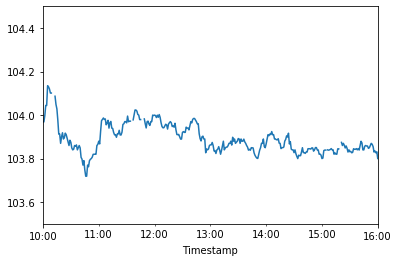

In [19]:
# plot
filled['2011-11-03':'2011-11-04'].plot()
plt.ylim(103.5, 104.5)
plt.show()

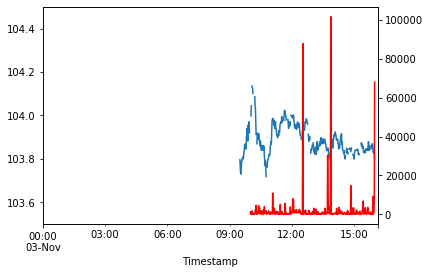

In [20]:
vwap['2011-11-03':'2011-11-04'].plot()
plt.ylim(103.5, 104.5)
vol['2011-11-03':'2011-11-04'].plot(secondary_y=True, style='r')
plt.show()

In [21]:
ticks.head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,104.55,100
2011-11-01 08:53:07.459,104.43,150
2011-11-01 08:53:09.284,104.43,100
2011-11-01 08:54:03.921,104.50,100
2011-11-01 08:58:06.162,104.46,1000


In [22]:
# shift data
ticks.shift(1).head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,NaN,NaN
2011-11-01 08:53:07.459,104.55,100.0
2011-11-01 08:53:09.284,104.43,150.0
2011-11-01 08:54:03.921,104.43,100.0
2011-11-01 08:58:06.162,104.50,100.0


In [23]:
ticks.shift(-1).head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,104.43,150.0
2011-11-01 08:53:07.459,104.43,100.0
2011-11-01 08:53:09.284,104.50,100.0
2011-11-01 08:54:03.921,104.46,1000.0
2011-11-01 08:58:06.162,104.46,1000.0


In [24]:
# shift index
ticks.tshift(1, 'min').head()

,Price,Volume
Timestamp,,
2011-11-01 08:05:56.364,104.55,100
2011-11-01 08:54:07.459,104.43,150
2011-11-01 08:54:09.284,104.43,100
2011-11-01 08:55:03.921,104.50,100
2011-11-01 08:59:06.162,104.46,1000


In [25]:
mr = minute_return.between_time('9:30', '16:00')
mr.head()

Timestamp
2011-11-01 09:30:00    0.000192
2011-11-01 09:31:00   -0.000192
2011-11-01 09:32:00    0.000000
2011-11-01 09:33:00   -0.000096
2011-11-01 09:34:00    0.000000
dtype: float64

In [26]:
lagged = mr.shift(1)
lagged.head()

Timestamp
2011-11-01 09:30:00         NaN
2011-11-01 09:31:00    0.000192
2011-11-01 09:32:00   -0.000192
2011-11-01 09:33:00    0.000000
2011-11-01 09:34:00   -0.000096
dtype: float64

In [27]:
vol = vol.groupby(vol.index.day).transform(lambda x: x/x.sum())
vol.head()

Timestamp
2011-11-01 10:00:00    0.009464
2011-11-01 10:01:00    0.033932
2011-11-01 10:02:00    0.001009
2011-11-01 10:03:00    0.001059
2011-11-01 10:04:00    0.001160
Name: Volume, dtype: float64

In [28]:
vol.resample('D').sum()

Timestamp
2011-11-01    1.0
2011-11-02    1.0
2011-11-03    1.0
Freq: D, Name: Volume, dtype: float64

In [29]:
hour = vol.index.hour
hourly_volume = vol.groupby(hour).mean()

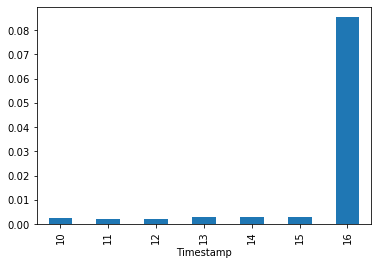

In [30]:
hourly_volume.plot(kind='bar')
plt.show()

### Date range

In [31]:
rng = pd.date_range('2005', '2012', freq='M')
rng

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31', '2005-11-30', '2005-12-31',
               '2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31', '2006-11-30', '2006-12-31',
               '2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
               '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31', '2007-11-30', '2007-12-31',
               '2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
               '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
      

In [32]:
pd.date_range('2005', periods=7*12, freq='M')

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31', '2005-11-30', '2005-12-31',
               '2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31', '2006-11-30', '2006-12-31',
               '2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
               '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31', '2007-11-30', '2007-12-31',
               '2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
               '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
      

In [33]:
pd.date_range('2005', periods=4, freq='Q')

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

In [34]:
pd.date_range('2005', periods=4, freq='Q-NOV')

DatetimeIndex(['2005-02-28', '2005-05-31', '2005-08-31', '2005-11-30'], dtype='datetime64[ns]', freq='Q-NOV')

In [35]:
wkrng = pd.date_range('2012-10-25', periods=3, freq='W')
wkrng

DatetimeIndex(['2012-10-28', '2012-11-04', '2012-11-11'], dtype='datetime64[ns]', freq='W-SUN')

In [36]:
wkrng[0].dayofweek

6

In [37]:
# DatetimeIndex is a subclass of Index
isinstance(rng, pd.Index)

True

In [38]:
rng[2:4]

DatetimeIndex(['2005-03-31', '2005-04-30'], dtype='datetime64[ns]', freq='M')

### Time zone

In [39]:
rng.tz
d = rng[0]
d

Timestamp('2005-01-31 00:00:00', freq='M')

In [40]:
localized = rng.tz_localize('US/Eastern')

In [41]:
localized[0]

Timestamp('2005-01-31 00:00:00-0500', tz='US/Eastern', freq='M')

In [42]:
# period
pd.period_range('2005', '2012', freq='A')

PeriodIndex(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012'], dtype='period[A-DEC]', freq='A-DEC')

In [43]:
prng = pd.period_range('2005', periods=7, freq='A')
prng

PeriodIndex(['2005', '2006', '2007', '2008', '2009', '2010', '2011'], dtype='period[A-DEC]', freq='A-DEC')

### Converting between time

In [44]:
p = pd.Period('2005', 'A')
p

Period('2005', 'A-DEC')

In [45]:
p.to_timestamp()

Timestamp('2005-01-01 00:00:00')

In [46]:
p.to_timestamp('M', 's')

Timestamp('2005-01-31 00:00:00')

In [47]:
p.to_timestamp('M', 'e')

Timestamp('2005-12-31 23:59:59.999999999')

In [48]:
p.end_time

Timestamp('2005-12-31 23:59:59.999999999')

In [49]:
prng.to_timestamp(how='e')

DatetimeIndex(['2005-12-31 23:59:59.999999999',
               '2006-12-31 23:59:59.999999999',
               '2007-12-31 23:59:59.999999999',
               '2008-12-31 23:59:59.999999999',
               '2009-12-31 23:59:59.999999999',
               '2010-12-31 23:59:59.999999999',
               '2011-12-31 23:59:59.999999999'],
              dtype='datetime64[ns]', freq='A-DEC')

In [50]:
prng.to_timestamp('M', 'e')

DatetimeIndex(['2005-12-31 23:59:59.999999999',
               '2006-12-31 23:59:59.999999999',
               '2007-12-31 23:59:59.999999999',
               '2008-12-31 23:59:59.999999999',
               '2009-12-31 23:59:59.999999999',
               '2010-12-31 23:59:59.999999999',
               '2011-12-31 23:59:59.999999999'],
              dtype='datetime64[ns]', freq='A-DEC')

In [51]:
rng

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31', '2005-11-30', '2005-12-31',
               '2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31', '2006-11-30', '2006-12-31',
               '2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
               '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31', '2007-11-30', '2007-12-31',
               '2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
               '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
      

In [52]:
rng.to_period()

PeriodIndex(['2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
             '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
             '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
             '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
             '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
             '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
             '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
             '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
             '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
             '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
             '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
             '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
             '2011-01', '2011-02', '2011-03', '2011-

In [53]:
rng.to_period('W')

PeriodIndex(['2005-01-31/2005-02-06', '2005-02-28/2005-03-06',
             '2005-03-28/2005-04-03', '2005-04-25/2005-05-01',
             '2005-05-30/2005-06-05', '2005-06-27/2005-07-03',
             '2005-07-25/2005-07-31', '2005-08-29/2005-09-04',
             '2005-09-26/2005-10-02', '2005-10-31/2005-11-06',
             '2005-11-28/2005-12-04', '2005-12-26/2006-01-01',
             '2006-01-30/2006-02-05', '2006-02-27/2006-03-05',
             '2006-03-27/2006-04-02', '2006-04-24/2006-04-30',
             '2006-05-29/2006-06-04', '2006-06-26/2006-07-02',
             '2006-07-31/2006-08-06', '2006-08-28/2006-09-03',
             '2006-09-25/2006-10-01', '2006-10-30/2006-11-05',
             '2006-11-27/2006-12-03', '2006-12-25/2006-12-31',
             '2007-01-29/2007-02-04', '2007-02-26/2007-03-04',
             '2007-03-26/2007-04-01', '2007-04-30/2007-05-06',
             '2007-05-28/2007-06-03', '2007-06-25/2007-07-01',
             '2007-07-30/2007-08-05', '2007-08-27/2007-